In [141]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import default_rng
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import statsmodels.api as sm
from scipy import stats

In [14]:
rng = default_rng(seed = 1)
m = 100 # number of points
n = 6 # number of features/variables

In [3]:
def random_generator():
    mu, sigma = rng.standard_normal(2)
    return mu + sigma * rng.standard_normal(m), mu, sigma

In [4]:
x = np.zeros((m,n))
mu = np.zeros(n)
sigma = np.zeros(n)
for i in range(4):
    x[:,i], mu[i], sigma[i] = random_generator()

In [5]:
x[:,4] = 1
x[:,5] = x[:,0] + 2 * x[:,1] + 10 * x[:,2]
epsilon = x[:,0] * rng.standard_normal(m)

<function matplotlib.pyplot.show(close=None, block=None)>

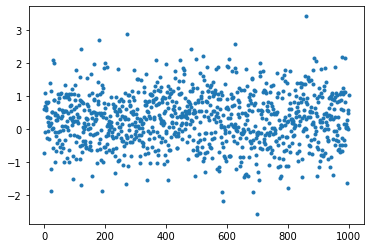

In [10]:
plt.plot(x[:,0],'.')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

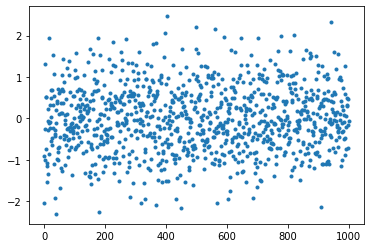

In [12]:
plt.plot(x[:,1],'.')
plt.show

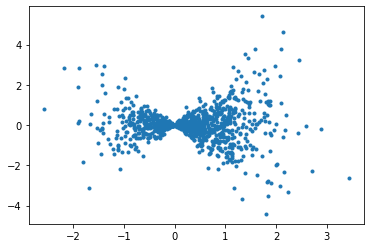

In [9]:
plt.plot(x[:,0], epsilon,'.')

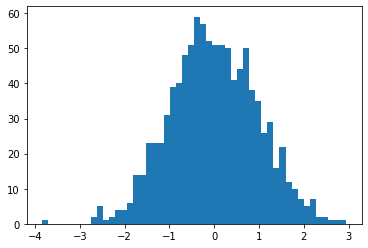

In [16]:
plt.hist(x2,bins = 50)
plt.show()

In [111]:
 y = 10 * x[:,0] + 0.001 * x[:,1] + x[:,2] + np.log(x[:,3]) + x[:,5] + x[:,0] * x[:,1] + epsilon

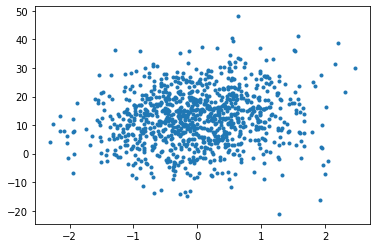

In [106]:
plt.plot(x[:,1],y,'.')

In [20]:
models = {'Linear Regression': LinearRegression(),
          'Ridge': Ridge(),
          'Lasso': Lasso()
         }

In [38]:
x = x.reshape(-1, 2)
for model in models:
    reg = models[model].fit(x, y)
    print(model)
    print('R2 score: ', reg.score(x,y))
    print('Coeff: ')
#     for i in range(n):
#         print('x' + str(i), reg.coef_[i])
    print(reg.coef_)
    print('Intercept: ', reg.intercept_)
    print('')
    print('')

Linear Regression
R2 score:  0.49820941883271397
Coeff: 
[0.         0.50174929]
Intercept:  -0.9872630872369313


Ridge
R2 score:  0.49820890284703345
Coeff: 
[0.         0.50123867]
Intercept:  -0.9872794327760747


Lasso
R2 score:  0.0
Coeff: 
[0. 0.]
Intercept:  -1.0033245979671315




In [113]:
est = sm.OLS(y, x)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 2.071e+04
Date:                Thu, 29 Oct 2020   Prob (F-statistic):               0.00
Time:                        15:49:39   Log-Likelihood:                -1476.1
No. Observations:                1000   AIC:                             2962.
Df Residuals:                     995   BIC:                             2987.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             9.8696      0.042    233.131      0.0

In [3]:
X = [[1,1,2],[2,2,5],[4,4,3],[0,0,8],[1,2,7]]
X = np.array(X)
y = np.array([4.5,8,10,9,10])

In [4]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [6]:
est = sm.OLS(y, X)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              221.2
Date:                Mon, 23 Nov 2020   Prob (F-statistic):                     0.00450
Time:                        11:30:53   Log-Likelihood:                         -3.3041
No. Observations:                   5   AIC:                                      12.61
Df Residuals:                       2   BIC:                                      11.44
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


In [7]:
np.corrcoef(X.T)

array([[ 1.        ,  0.95579158, -0.58191818],
       [ 0.95579158,  1.        , -0.46277515],
       [-0.58191818, -0.46277515,  1.        ]])

In [8]:
X[:,0], X[:,1] = (X[:,0] + X[:,1]), (X[:,0] - X[:,1])

In [9]:
est = sm.OLS(y, X)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              221.2
Date:                Mon, 23 Nov 2020   Prob (F-statistic):                     0.00450
Time:                        14:06:57   Log-Likelihood:                         -3.3041
No. Observations:                   5   AIC:                                      12.61
Df Residuals:                       2   BIC:                                      11.44
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


In [11]:
X[:,1] = 2 * X[:,1]
est = sm.OLS(y, X)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              221.2
Date:                Mon, 23 Nov 2020   Prob (F-statistic):                     0.00450
Time:                        14:14:01   Log-Likelihood:                         -3.3041
No. Observations:                   5   AIC:                                      12.61
Df Residuals:                       2   BIC:                                      11.44
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     86.54
Date:                Sat, 05 Dec 2020   Prob (F-statistic):           3.95e-15
Time:                        14:32:43   Log-Likelihood:                -62.781
No. Observations:                 100   AIC:                             129.6
Df Residuals:                      98   BIC:                             134.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0252      0.046    -22.286      0.0

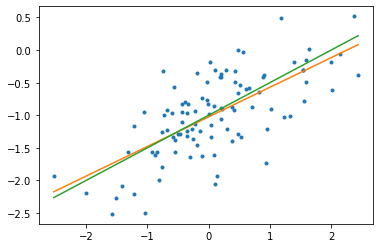

In [79]:
m = 100
x = rng.standard_normal(m)
x = sm.add_constant(x)
eps = .5 * rng.standard_normal(m)
beta = [-1, .5]
y = np.dot(x,beta) + eps


est = sm.OLS(y, x)
est1 = est.fit()
print(est1.summary())
# can use est2.params to get the coefficients

plt.plot(x[:,1],y,'.')
xx = np.linspace(min(x[:,1]), max(x[:,1]),m)
xx = sm.add_constant(xx)
y_pred = est1.predict(xx)
plt.plot(xx[:,1],y_pred,label = 'Least Squares line')
plt.plot(xx[:,1],np.dot(xx,beta), label = 'Population Regression line')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     16.28
Date:                Sat, 05 Dec 2020   Prob (F-statistic):           0.000108
Time:                        14:32:53   Log-Likelihood:                -185.66
No. Observations:                 100   AIC:                             375.3
Df Residuals:                      98   BIC:                             380.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1129      0.159     -7.015      0.0

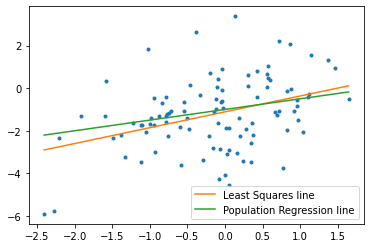

In [80]:
x = rng.standard_normal(m)
x = sm.add_constant(x)
eps = 1.5 * rng.standard_normal(m)
beta = [-1, .5]
y = np.dot(x,beta) + eps


est = sm.OLS(y, x)
est1 = est.fit()
print(est1.summary())
# can use est2.params to get the coefficients

plt.plot(x[:,1],y,'.')
xx = np.linspace(min(x[:,1]), max(x[:,1]),m)
xx = sm.add_constant(xx)
y_pred = est1.predict(xx)
plt.plot(xx[:,1],y_pred,label = 'Least Squares line')
plt.plot(xx[:,1],np.dot(xx,beta), label = 'Population Regression line')
plt.legend()

We can see that $x$ and $y$ are positively correlated.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     8.317
Date:                Sat, 05 Dec 2020   Prob (F-statistic):           0.000464
Time:                        14:33:56   Log-Likelihood:                -185.43
No. Observations:                 100   AIC:                             376.9
Df Residuals:                      97   BIC:                             384.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0396      0.194     -5.371      0.0

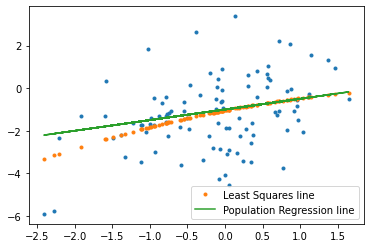

In [83]:
# x = np.concatenate((x,x[:,[1]]**2), axis = 1)

est = sm.OLS(y, x)
est2 = est.fit()
print(est2.summary())
# can use est2.params to get the coefficients

plt.plot(x[:,1],y,'.')
# xx = np.linspace(min(x[:,1]), max(x[:,1]),m)
# xx = sm.add_constant(xx)
y_pred = est2.predict(x)
plt.plot(x[:,1],y_pred,'.',label = 'Least Squares line')
plt.plot(x[:,1],np.dot(x[:,0:2],beta), label = 'Population Regression line')
plt.legend()

In [131]:
x = rng.uniform(0,1,m)
x = sm.add_constant(x)
x = np.concatenate((x,0.5 * x[:,[1]] + rng.standard_normal((m,1))/10),axis = 1)
beta = [2, 2, .5]
eps = rng.standard_normal(m)
y = np.dot(x,beta) + eps

In [132]:
np.corrcoef(x.T)

array([[       nan,        nan,        nan],
       [       nan, 1.        , 0.84442144],
       [       nan, 0.84442144, 1.        ]])

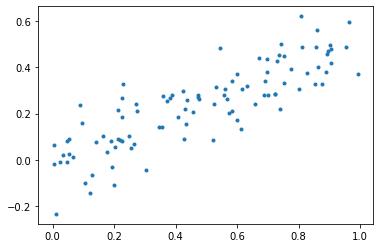

In [133]:
plt.plot(x[:,1],x[:,2],'.')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     28.07
Date:                Sat, 05 Dec 2020   Prob (F-statistic):           2.41e-10
Time:                        15:21:00   Log-Likelihood:                -135.45
No. Observations:                 100   AIC:                             276.9
Df Residuals:                      97   BIC:                             284.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9437      0.186     10.443      0.0

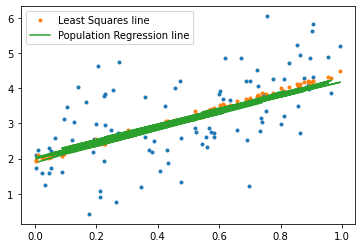

In [135]:
# x = np.concatenate((x,x[:,[1]]**2), axis = 1)

est = sm.OLS(y, x)
est2 = est.fit()
print(est2.summary())
# can use est2.params to get the coefficients

plt.plot(x[:,1],y,'.')
# xx = np.linspace(min(x[:,1]), max(x[:,1]),m)
# xx = sm.add_constant(xx)
y_pred = est2.predict(x)
plt.plot(x[:,1],y_pred,'.',label = 'Least Squares line')
plt.plot(x[:,1],np.dot(x,beta), label = 'Population Regression line')
plt.legend()

In [136]:
est = sm.OLS(y, x[:,0:2])
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     56.30
Date:                Sat, 05 Dec 2020   Prob (F-statistic):           2.86e-11
Time:                        15:21:10   Log-Likelihood:                -135.58
No. Observations:                 100   AIC:                             275.2
Df Residuals:                      98   BIC:                             280.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9495      0.185     10.534      0.0

In [137]:
x = np.concatenate((x,[[1,.1,.8]]), axis = 0)

In [138]:
y = np.concatenate((y,[6]), axis = 0)

In [139]:
est = sm.OLS(y, x)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     24.16
Date:                Sat, 05 Dec 2020   Prob (F-statistic):           2.95e-09
Time:                        15:22:23   Log-Likelihood:                -141.98
No. Observations:                 101   AIC:                             290.0
Df Residuals:                      98   BIC:                             297.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0480      0.193     10.601      0.0

In [140]:
est = sm.OLS(y, x[:,0:2])
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     43.26
Date:                Sat, 05 Dec 2020   Prob (F-statistic):           2.28e-09
Time:                        15:23:26   Log-Likelihood:                -143.91
No. Observations:                 101   AIC:                             291.8
Df Residuals:                      99   BIC:                             297.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0687      0.196     10.574      0.0